# Electronics Product Recommendation System Using Content-Based Filtering
---
##  Step 1: Problem Definition
Online shopping websites sell thousands of electronic items like laptops, phones, smartwatches, etc. But when customers search for products, they often get confused due to so many options. Sometimes they miss better or similar products because of this overload.
To solve this issue, I created a recommendation system that suggests similar electronic products to users based on what they are viewing. This can help improve the customer experience and make product discovery easier.

---
##  Business Problem

E-commerce platforms face challenges such as:
- Users not finding relevant or similar products easily
- Losing sales due to decision confusion
- Poor user experience with basic search or filters

By suggesting similar or related products using intelligent filtering, platforms can:
- Improve customer satisfaction
- Boost conversions and revenue
- Make browsing more personalized and engaging
---
##  Project Objective

The main goal of this project is to:
- Recommend similar electronic products to users
- Use product features (like "Touchscreen", "5G", "Wireless") to compare and find matches
- Build a simple and smart system that can help users explore more options without manual searching
---
##  Solution Approach

To build this recommendation engine, I used **Content-Based Filtering** with **NLP techniques**.  
Here are the steps I followed:
1. Cleaned and prepared the product dataset
2. Used **TF-IDF** to convert product features into numerical form
3. Measured similarity using **cosine similarity**
4. Created a function to return top-N similar products

This system recommends products based on their **features and descriptions**, not user history — so it works well even for new users (cold start problem).

---
## What This Project Does

The system takes a product as input and returns a list of **most similar products** based on content.  
It helps:
- **Customers**: Explore similar products easily
- **E-commerce platforms**: Improve product discovery and cross-selling
- **Marketing teams**: Recommend alternatives when products go out of stock
---

## Real Use Case

This kind of recommendation engine can be used in:
- Online electronics stores (like Amazon, Flipkart)
- E-commerce platforms offering large product catalogs
- Any business that wants to suggest alternatives based on product specs
---
### Dataset Source
This is a sample dataset created for learning purposes. 

### Adding Necessary Libraries For The Project
Before starting with the data analysis and building the recommendation system, I imported all the important Python libraries that are needed in this project.
Here are the main libraries used:

- **pandas** – for handling and exploring the dataset
- **numpy** – for numerical operations
- **sklearn** – for text vectorization (TF-IDF) and measuring similarity
- **warnings** – to ignore any unwanted warning messages while running the notebook
These libraries help us read the data, clean it, convert text into numbers, and build the actual recommendation logic.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import  matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.simplefilter("ignore")

In [2]:
pd.set_option("display.max_rows",None)

## Step 2: Data Understanding 

In [3]:
df=pd.read_csv("electronics_renamed.csv")

In [4]:
df.head()

,product_id,product_features,product_name
0,0,Laptop Windows Touchscreen,TP-Link Archer AX6000
1,1,Headphones Wireless Noise-Cancelling,Canon EOS 90D
2,2,Laptop Windows Touchscreen,LG OLED C2
3,3,Smartwatch Fitness Waterproof,Dell Inspiron 15
4,4,Smartphone Android 5G,TP-Link Archer AX6000


In this step, I explored the dataset to understand what kind of information it contains and how it can be used for building the recommendation system.
The dataset has 3 main columns:
- **product_id**: A unique number given to each product.
- **product_features**: This column contains keywords that describe the main features of each product (like "Wireless", "5G", "Touchscreen", etc.).
- **product_name**: The actual name or title of the electronic product.
By using the `product_features` column, we can compare products and find similar ones.
- This is the main column used for building the content-based recommendation engine.
- I also used `df.head()` to view the first few rows and confirm the structure of the data.

In [5]:
df.shape

(4803, 3)

In [6]:
df.isnull().sum()                                        

product_id          0
product_features    0
product_name        0
dtype: int64

In [7]:
df["product_features"].value_counts()

product_features
TV Smart 4K                             526
Tablet WiFi Stylus                      504
Smartphone Android 5G                   489
Monitor Gaming Curved                   483
Headphones Wireless Noise-Cancelling    479
Camera DSLR HD                          476
Speaker Bluetooth Portable              472
Smartwatch Fitness Waterproof           464
Laptop Windows Touchscreen              461
Router Dual-Band Gigabit                449
Name: count, dtype: int64

## Step 3: Data Visualization

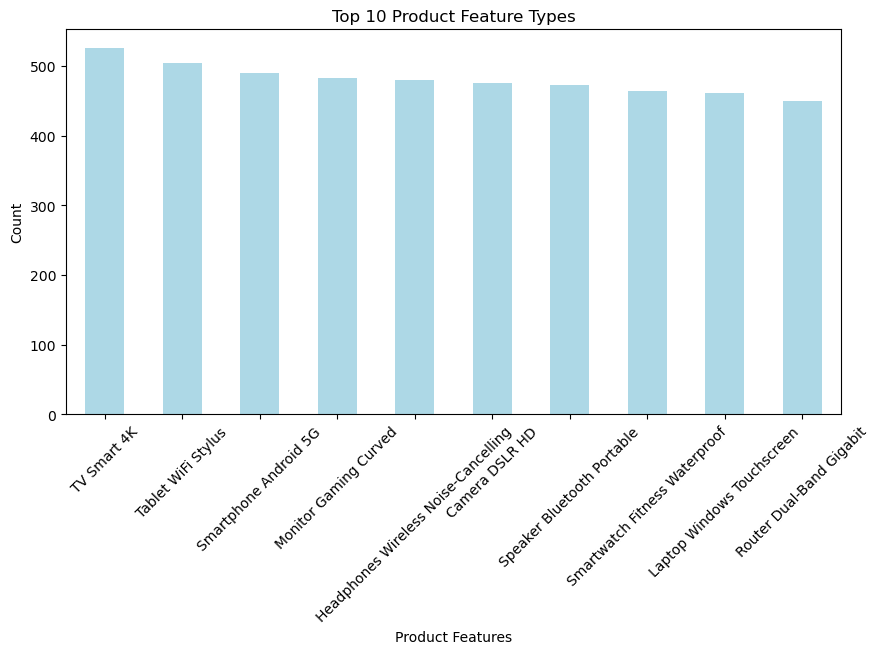

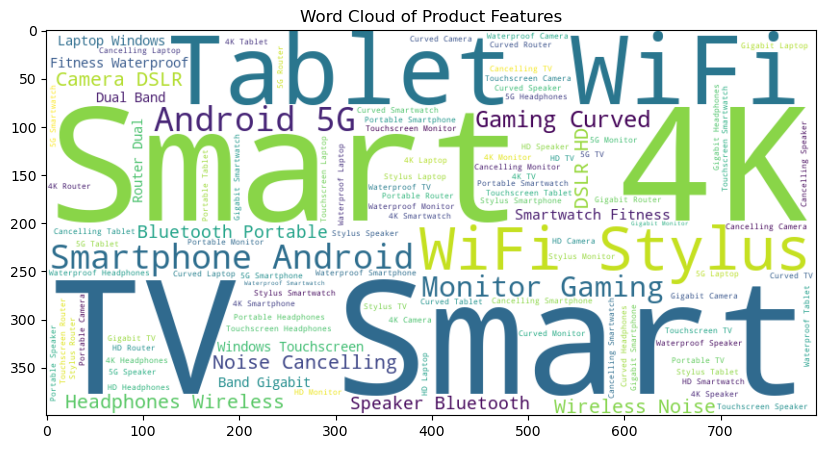

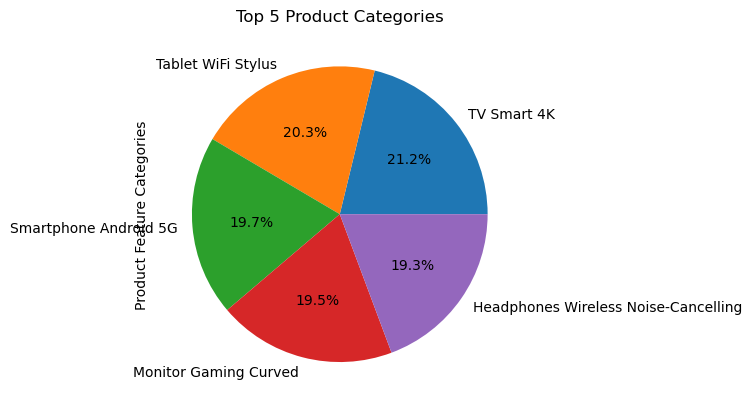

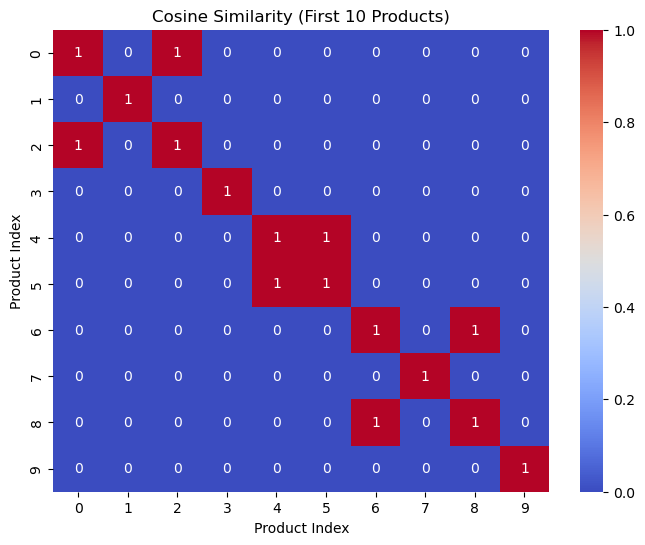

In [8]:
# 👁 View top 10 most common product features
top_features = df['product_features'].value_counts().head(10)

# 1. Bar Chart: Top Product Feature Types
plt.figure(figsize=(10, 5))
top_features.plot(kind='bar', color='lightblue')
plt.title("Top 10 Product Feature Types")
plt.xlabel("Product Features")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#  2. Word Cloud: Words in Product Features
all_text = " ".join(df['product_features'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Product Features")
plt.show()

# 3. Pie Chart: Top 5 Product Categories
top_5 = df['product_features'].value_counts().head(5)
top_5.plot(kind='pie', autopct='%1.1f%%')
plt.title("Top 5 Product Categories")
plt.ylabel("Product Feature Categories")
plt.show()

# 4. TF-IDF Vectorization
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(df['product_features'])

#  5. Cosine Similarity Matrix
similarity = cosine_similarity(feature_vectors)

#  6. Heatmap: Similarity for First 10 Products
plt.figure(figsize=(8, 6))
sns.heatmap(similarity[:10, :10], annot=True, cmap='coolwarm')
plt.title("Cosine Similarity (First 10 Products)")
plt.xlabel("Product Index")
plt.ylabel("Product Index")
plt.show()

### Data Visualization and Similarity Score Explanation

To understand the product data better and build a working recommendation system, I created some simple graphs and used text processing steps.  
Below is a step-by-step explanation in simple words:

---

#### View Top Product Features

- I first checked which product types (like "Smartphone", "TV", "Laptop") appear most often in the data.  
  Why: This helps me know what kinds of products are common.

---

#### 1. Bar Chart – Top 10 Product Features

- I made a bar chart showing the 10 most frequent product types.  
  Why: It helps to clearly see which product types appear the most.

---

#### 2. Word Cloud – Most Used Words

- I created a word cloud from the product features.  
  Why: To quickly see which keywords (like “4K”, “Smart”, “TV”) are used the most in the product descriptions.

---

#### 3. Pie Chart – Top 5 Product Categories

- I made a pie chart showing the top 5 product categories and how much they appear.  
  Why: It shows the percentage share of each top category in a simple circular graph.

---

#### 4. TF-IDF Vectorization – Convert Text to Numbers

- I used TF-IDF to turn text features into numbers.  
  Why: Computers don’t understand text. TF-IDF helps us convert feature words into numbers based on importance.

---

#### 5. Cosine Similarity – Compare Products

- I used cosine similarity to compare products and see how similar they are.  
  Why: This helps us find and recommend products that are similar in features.

---

#### 6. Heatmap – Show Product Similarity

- I made a heatmap to compare the first 10 products.  
  Why: It shows which products are similar by using colors.

---

#### Summary

These steps helped me explore the data and prepare it for giving good product recommendations to users.

## Step 4: Text Processing

#### Converting the Text Data to Feature Vectors

- Before we can compare products, we need to convert the product feature text into numerical values.  
- I used **TF-IDF Vectorization** (Term Frequency - Inverse Document Frequency) to do this.
- TF-IDF assigns a score to each word based on how important it is in that product's features compared to others.
- This step helps us turn text data into a format that can be used to calculate similarity between products.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
feature_vectors=vectorizer.fit_transform(df["product_features"])
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15337 stored elements and shape (4803, 32)>
  Coords	Values
  (0, 15)	0.5773502691896258
  (0, 30)	0.5773502691896258
  (0, 26)	0.5773502691896258
  (1, 14)	0.5
  (1, 31)	0.5
  (1, 17)	0.5
  (1, 6)	0.5
  (2, 15)	0.5773502691896258
  (2, 30)	0.5773502691896258
  (2, 26)	0.5773502691896258
  (3, 22)	0.5773502691896257
  (3, 10)	0.5773502691896257
  (3, 28)	0.5773502691896257
  (4, 21)	0.5773502691896257
  (4, 2)	0.5773502691896257
  (4, 1)	0.5773502691896257
  (5, 21)	0.5773502691896257
  (5, 2)	0.5773502691896257
  (5, 1)	0.5773502691896257
  (6, 19)	0.5
  (6, 9)	0.5
  (6, 3)	0.5
  (6, 12)	0.5
  (7, 27)	0.5773502691896258
  (7, 20)	0.5773502691896258
  :	:
  (4795, 3)	0.5
  (4795, 12)	0.5
  (4796, 15)	0.5773502691896258
  (4796, 30)	0.5773502691896258
  (4796, 26)	0.5773502691896258
  (4797, 22)	0.5773502691896257
  (4797, 10)	0.5773502691896257
  (4797, 28)	0.5773502691896257
  (4798, 22)	0.5773502691896257
  (4798, 10)	0.57

##### Cosine Similarity
- After converting the text into numbers using TF-IDF, I used **cosine similarity** to compare the products.
- Cosine similarity measures how similar two products are based on their feature vectors.
- The result is a score between 0 and 1.
  - 1 means very similar
  - 0 means not similar at all
- This helps us find which products are similar and recommend them to the user.

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(feature_vectors)
print(similarity)

[[1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [11]:
print(similarity.shape)

(4803, 4803)


#### Creating a List of All the Gadget Names in the Dataset
- In this step, I made a list of all the gadget names from the dataset.
This list helps us:
- Search for a product by name
- Use it to match with the user's input
- Show recommendations based on the selected product
- To work with product names easily, I first created a list of all unique gadget names from the dataset.
- Then, I converted them to lowercase. This helps in matching product names without errors due to capital or small letters.

In [12]:
# Ensure unique and clean titles
list_of_all_product_names = df['product_name'].dropna().unique().tolist()
list_of_all_product_names_lower = [name.lower() for name in list_of_all_product_names]

### Step 5: Taking Gadget Name as User Input

#### Taking Gadget Name as User Input
- I asked the user to enter the name of the gadget they are looking for.
- This input will be used to find similar products from the dataset.

In [13]:
# Get user input in a clean format
gadget_name= input("Enter The Gadget Name")

Enter The Gadget Name ipad


#### Finding The Close Match To The Given gadget
- To make the system more user-friendly, I added fuzzy matching.  
- Fuzzy matching helps when users type with small spelling mistakes or different wording.
- For example, if a user types "iphon 14" instead of "iPhone 14", the system can still understand and find the closest correct match.
- If a close match is found, we use it to generate recommendations.  
- If no match is found, the system will ask the user to check the input and try again.
- This makes the recommendation system more flexible and easy to use.

In [14]:
import difflib
# Fuzzy matching using difflib with lower cutoff
find_close_match = difflib.get_close_matches(gadget_name, list_of_all_product_names_lower, n=1, cutoff=0.4)

In [15]:
if find_close_match:
    best_match = find_close_match[0]
    print(f"\n Closest match found: {best_match}")
    # Map matched lower title to original case title
    original_product_name = next((product_name for product_name in list_of_all_product_names if product_name.lower() == best_match), None)
else:
    print(" No close match found. Please check your input and try again.")


 Closest match found: ipad pro 11


In [16]:
close_match=find_close_match[0]
print(close_match)

ipad pro 11


#### Find the Index of the Gadget with the Given Title
- After finding the closest matching gadget name from the user input, I need to find where that gadget is located in the dataset.
- This means getting its index number, which tells me the exact row in the data.
- I use this index to compare that gadget with others and find similar ones for recommendations.
- This step is important because it connects the user's input to the data so the system knows where to start.

In [17]:
 # Get index and proceed
index_of_gadget = df[df['product_name'] == original_product_name].index[0]
print(f"Index of matched gadget: {index_of_gadget}")

Index of matched gadget: 15


### Getting the List of Similar Gadgets
- After finding the selected gadget, I check how similar it is to other gadgets.
- I use similarity scores to compare all products.
- Higher score means more similar.
- This list is used to recommend products to the user.

In [21]:
similarity_score = [(i, float(score)) for i, score in enumerate(similarity[index_of_gadget])]
print(similarity_score)

[(0, 0.0), (1, 1.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 1.0), (14, 0.0), (15, 1.0), (16, 0.0), (17, 0.0), (18, 1.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 1.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 1.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 1.0), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.0), (48, 0.0), (49, 1.0), (50, 0.0), (51, 0.0), (52, 0.0), (53, 1.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 1.0), (58, 0.0), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.0), (65, 0.0), (66, 0.0), (67, 0.0), (68, 0.0), (69, 0.0), (70, 0.0), (71, 0.0), (72, 0.0), (73, 0.0), (74, 0.0), (75, 0.0), (76, 0.0), (77, 0.0), (78, 0.0), (79, 0.0), (80, 0.0), (81, 0.0), (82, 0.0), (83, 0.0), (84, 0.0), (85, 0.0), (86, 0.0), (87, 0.0), (88, 0.0), (89, 1.0), (90, 0.0), (91, 0.0

In [19]:
len(similarity_score)

4803

### Sorting the Gadgets Based on Their Similarity Score
- After getting similarity scores of gadgets, I need to sort them.
- Sorting helps me find the most similar ones first.
- I arrange the gadgets from highest to lowest similarity score.
- The top  5 gadgets in the list are the best matches.
- These sorted results are used for giving recommendations.

In [20]:
sorted_similarity_score = sorted(similarity_score, key=lambda x: float(x[1]), reverse=True)

print("Top 5 Similar Products:")
for i in sorted_similarity_score[1:6]:
    index = i[0]
    score = round(float(i[1]), 3)
    print(f"{df.iloc[index]['product_name']} — Score: {score}")

Top 5 Similar Products:
Acer Predator X34 — Score: 1.0
iPad Pro 11 — Score: 1.0
Canon EOS 90D — Score: 1.0
JBL Flip 6 — Score: 1.0
JBL Flip 6 — Score: 1.0


## Final  Conclusion

- In this project, I built an **Electronics Product Recommendation System** using **content-based filtering** techniques.
- I started by **exploring the dataset** and understanding the types of product features. Then, I used **TF-IDF vectorization** to convert text into numbers, and **cosine similarity** to compare how similar products are.
- To make the system more user-friendly, I added **fuzzy matching** so that even if the user makes small spelling mistakes, the system can still find the correct product.
- Based on the selected gadget, the system shows a list of **similar products** that the user might be interested in.
- This type of recommendation system is helpful in real-world applications like **e-commerce platforms**, where users want to explore gadgets with similar features.
- Overall, it was a great learning experience where I combined **text processing**, **similarity scoring**, and **practical logic** to solve a real-world problem in a simple and effective way.